## KMeans algorithm
1. initialize k cluster centroids
2. repeat the following:
   - for each point, compute which centroid is nearest to it
   - for each centroid, move its location to the mean location of the points assigned to it

### import libs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### generate random data points

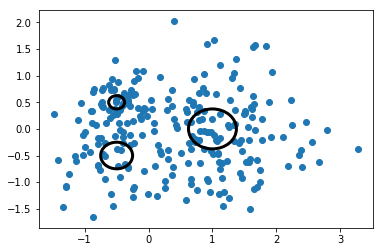

In [2]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

### initialize k cluster centroids

In [3]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

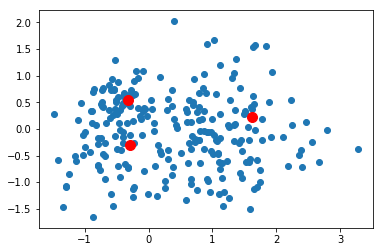

In [4]:
# show initial centroids
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

### compute distance for each data points and move centroids

In [5]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

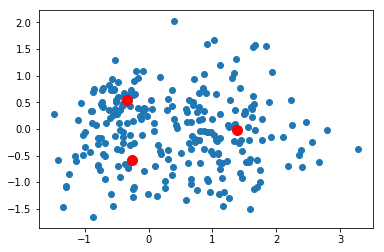

In [6]:
# display one step
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

### complete kmeans, update centroids in a loop

In [7]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.sum((a - b) ** 2)

def kmeans(points, k):
    centroids = initialize_centroids(points, k)
    centroids_old = np.zeros_like(centroids)
    error = 1e-8
    while dist(centroids, centroids_old) > error:
        centroids_old = centroids.copy()
        closest = closest_centroid(points, centroids)
        centroids = move_centroids(points, closest, centroids)
    return centroids

[[ 1.35283965 -0.15266957]
 [-0.50170381 -0.5930678 ]
 [-0.1692248   0.5676255 ]]


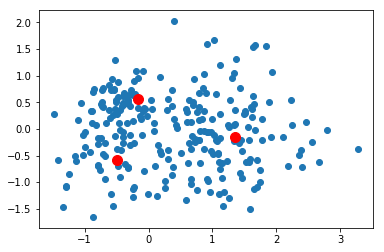

In [8]:
centroids = kmeans(points, 3)
print(centroids)

# display result
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

### compare with sklearn KMeans

[[-0.1692248   0.5676255 ]
 [ 1.35283965 -0.15266957]
 [-0.50170381 -0.5930678 ]]


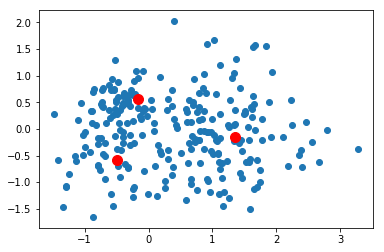

In [9]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(points)
# Getting the cluster labels
labels = kmeans.predict(points)
# Centroid values
centroids = kmeans.cluster_centers_
print(centroids)

# display result
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)